# NBA Team Clustering Analysis Project

Within the NBA, there are many different types of team play styles. For instance, some teams focus on three point shooting, while others emphasize defense and rebounding. The goal of this project is to use dimensionality reduction and K-means clustering analysis to identify distinct clusters of different team play styles throughout the NBA. Furthermore, by comparing the different play styles with total wins within the league, it is possible to see whether there is a dominant team play style or set of styles in the NBA. Finally, by performing this analysis on historical data dating back to the 1976 season (first season after the merger between the ABA and NBA), it is possible to identify trends in how the play style of the league as a whole has shifted over time.

Creators: Karthik Guruvayurappan and Akshay Gopalkrishnan

Data Source: basketball-reference.com

In [1]:
# import necessary packages for data analysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model

In [155]:
pd.set_option('min_rows', 100)
pd.set_option('max_rows', 100)

### Formatting Datasets from basketball-reference.com into Dictionary

This cell formats all of the datasets collected from basketball-reference.com into a dictionary format. To access the datasets, the keys are in the format: 'Year Type'. The datasets are read in as pandas DataFrames

Available Years Include: 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019

Available Dataset Types Include: Team, Opponent, Misc, Standings

A sample statement to access a dataset would be: team_2019 = datasets['2019 Team']

In [156]:
# create a list to hold all dataset names
dataset_list = []

# adds all CSV files from the datasets folder to a list
for dataset in os.listdir('./Datasets'):
    if (dataset.endswith('.csv')):
        dataset_list.append(dataset)

# adds all datasets to a dictionary with the key being 'Year Type' 
datasets = {}
for dataset in dataset_list:
    data_file = pd.read_csv('./Datasets/' + dataset)
    dataset_name = dataset[dataset.index('- ') + 1 : dataset.index('.')].strip()
    datasets[dataset_name] = data_file

### Exploratory Data Analysis



In [157]:
# define function to perform linear regression with data columns
def linear_regression(data, stat_one, stat_two):
    stat_x = data[stat_one].to_numpy().reshape(-1 ,1)
    stat_y = data[stat_two].to_numpy()
    lin_reg = LinearRegression().fit(stat_x, stat_y)
    sns.lmplot(x=stat_one, y=stat_two, data=data)
    corr_coeff = pearsonr(data[stat_one].to_numpy(), stat_y)
    print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
    print('Correlation Coefficient: ' + str(corr_coeff[0]))

In [158]:
team_2019 = datasets['2019 Team']
team_2019.head()

Rk                    Team   G     MP    FG   FGA    FG%    3P   3PA  \
0  1.0        Milwaukee Bucks*  82  241.2  43.4  91.1  0.476  13.5  38.2   
1  2.0  Golden State Warriors*  82  241.5  44.0  89.8  0.491  13.3  34.4   
2  3.0    New Orleans Pelicans  82  240.9  43.7  92.2  0.473  10.3  29.9   
3  4.0     Philadelphia 76ers*  82  241.5  41.5  88.2  0.471  10.8  30.2   
4  5.0   Los Angeles Clippers*  82  241.8  41.3  87.5  0.471  10.0  25.8   

     3P%  ...    FT%   ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  
0  0.353  ...  0.773   9.3  40.4  49.7  26.0  7.5  5.9  13.9  19.6  118.1  
1  0.385  ...  0.801   9.7  36.5  46.2  29.4  7.6  6.4  14.3  21.4  117.7  
2  0.344  ...  0.761  11.1  36.2  47.3  27.0  7.4  5.4  14.8  21.1  115.4  
3  0.359  ...  0.771  10.9  36.9  47.8  26.9  7.4  5.3  14.9  21.3  115.2  
4  0.388  ...  0.792   9.7  35.8  45.5  24.0  6.8  4.7  14.5  23.3  115.1  

[5 rows x 25 columns]

Regression Coefficient: 0.9068932865452393
Correlation Coefficient: 0.7186039777843883


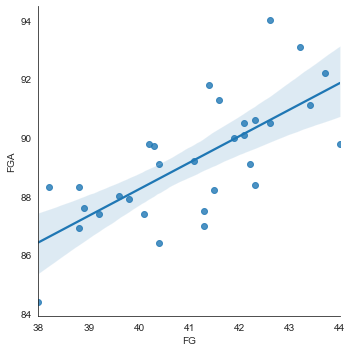

In [159]:
# plot FG against FGA for 2019 Team Data
linear_regression(team_2019, 'FG', 'FGA')

Regression Coefficient: 0.00651197950235929
Correlation Coefficient: 0.8227110723565924


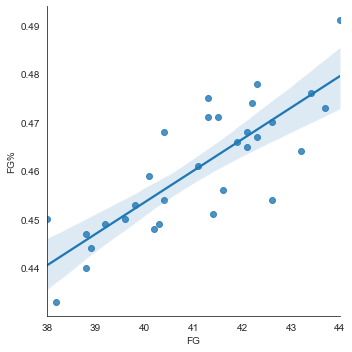

In [160]:
# plot FG against FG% for 2019 Team Data
linear_regression(team_2019, 'FG', 'FG%')

Regression Coefficient: 0.0012359674059123007
Correlation Coefficient: 0.19706427751947828


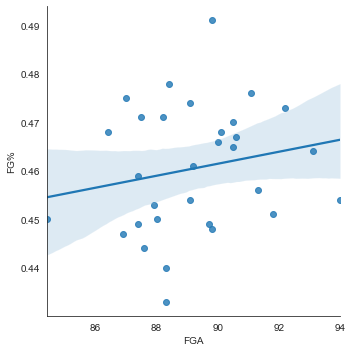

In [161]:
# plot FGA against FG% for 2019 Team Data
linear_regression(team_2019, 'FGA', 'FG%')

Regression Coefficient: 2.7204858228416833
Correlation Coefficient: 0.9546820957860316


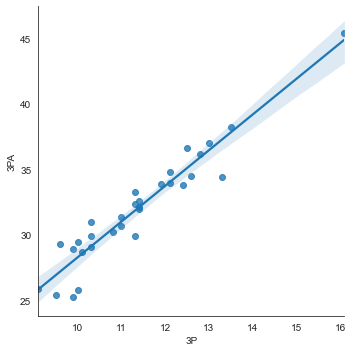

In [162]:
# plot 3P against 3PA for 2019 Team Data
linear_regression(team_2019, '3P', '3PA')

Regression Coefficient: 0.0007309318929900512
Correlation Coefficient: 0.07199849961839559


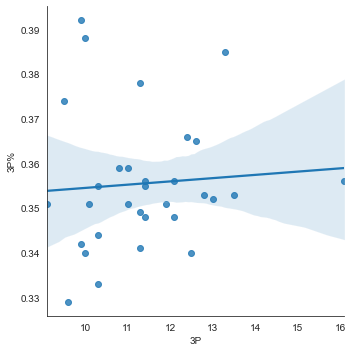

In [163]:
# plot 3P against 3P% for 2019 Team Data
linear_regression(team_2019, '3P', '3P%')

Regression Coefficient: -0.0008018528074170016
Correlation Coefficient: -0.22507583888769397


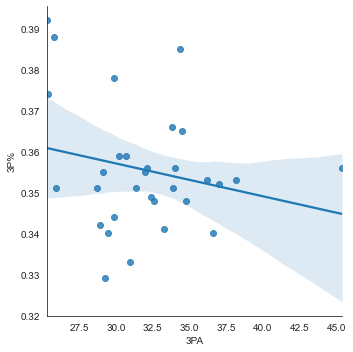

In [164]:
# plot 3PA against 3P% for 2019 Team Data
linear_regression(team_2019, '3PA', '3P%')

Regression Coefficient: 1.1618018926466025
Correlation Coefficient: 0.9056437705724992


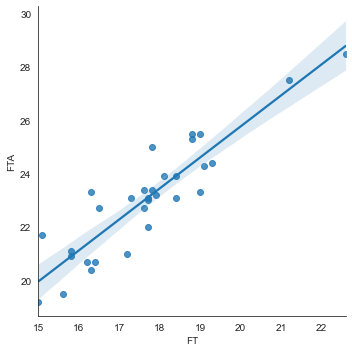

In [165]:
# plot FT against FTA for 2019 Team Data
linear_regression(team_2019, 'FT', 'FTA')

Regression Coefficient: 0.004022339435308713
Correlation Coefficient: 0.21157532321076095


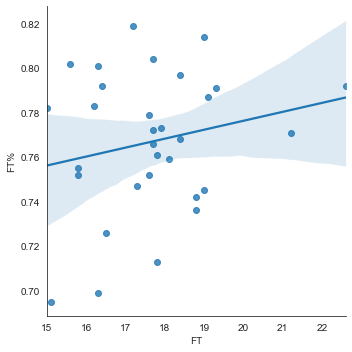

In [166]:
# plot FT against FT% for 2019 Team Data
linear_regression(team_2019, 'FT', 'FT%')

Regression Coefficient: -0.0032791768593015778
Correlation Coefficient: -0.22127166925601113


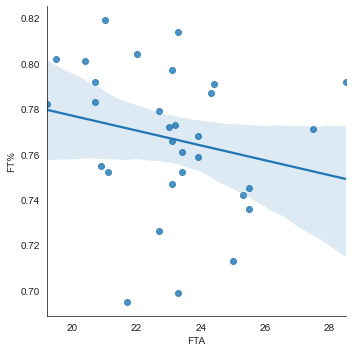

In [167]:
# plot FTA against FT% for 2019 Team Data
linear_regression(team_2019, 'FTA', 'FT%')

Regression Coefficient: 106.55227596017066
Correlation Coefficient: 0.6487666347472236


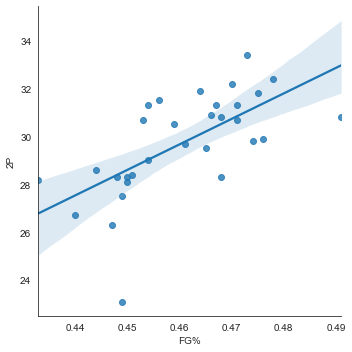

In [168]:
# plot FG% against 2P for 2019 Team Data
linear_regression(team_2019, 'FG%', '2P')

Regression Coefficient: 92.61328998171089
Correlation Coefficient: 0.27042550528265547


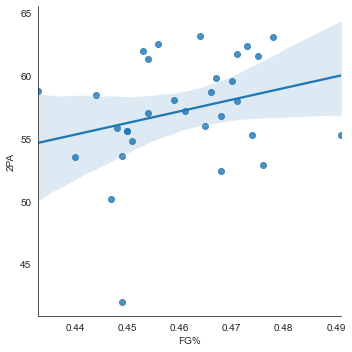

In [169]:
# plot FG% against 2P for 2019 Team Data
linear_regression(team_2019, 'FG%', '2PA')

Regression Coefficient: 1.0253695895143273
Correlation Coefficient: 0.6722072417285532


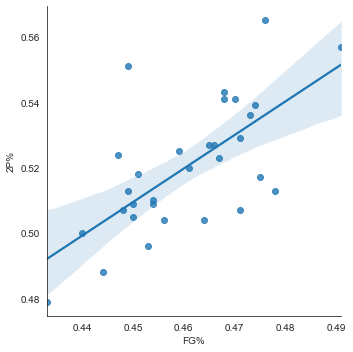

In [170]:
# plot FG% against 2P% for 2019 Team Data
linear_regression(team_2019, 'FG%', '2P%')

Regression Coefficient: 1.1213520291837662
Correlation Coefficient: 0.5247338303097445


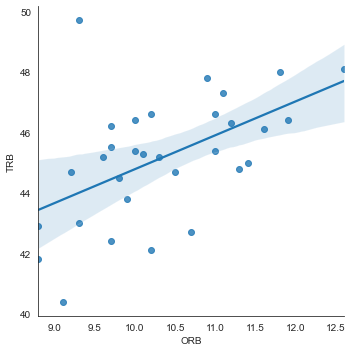

In [171]:
# plot ORB against TRB for 2019 Team Data
linear_regression(team_2019, 'ORB', 'TRB')

Regression Coefficient: 1.033604783715708
Correlation Coefficient: 0.8839580474966036


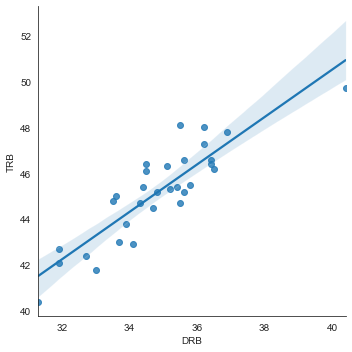

In [172]:
# plot DRB against TRB for 2019 Team Data
linear_regression(team_2019, 'DRB', 'TRB')

Regression Coefficient: 0.12080483356133173
Correlation Coefficient: 0.06610042615114779


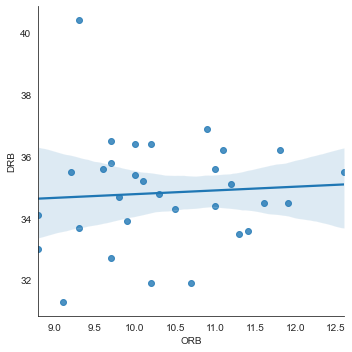

In [173]:
# plot ORB against DRB for 2019 Team Data
linear_regression(team_2019, 'ORB', 'DRB')

### Data Cleaning and Aggregation

In [174]:
def aggregate_data(stat_types , stats):
    
    np_datasets =  {} ##this will be a dictionary of arrays

    for key in sorted (datasets.keys()): 
        if key[5:len(key)] in stat_types:
            season_data = datasets[key]
            if key[0:4] in np_datasets:
                np_datasets[key[0:4]] = pd.merge(np_datasets[key[0:4]], season_data, on = ['Team'])
            else:
                np_datasets[key[0:4]] = season_data

    ## Adds the year to team name to provide unique identification to each team      
    team_data = {}
    for key in np_datasets:

            for index in np_datasets[key].index:
                if 'League Average' not in np_datasets[key].loc[index, 'Team']:
                    team_key = np_datasets[key].loc[index, 'Team'] + " " + key
                    team_data[team_key] = np_datasets[key].loc[index,:]


    agg_data = pd.DataFrame.from_dict(team_data, orient='index')
    agg_data = agg_data.loc[:, stats]
    
    
    return agg_data

In [175]:
agg_team_data = aggregate_data(['Team', 'Misc'], ['2PA', '3PA', 'PTS', 'DRtg'])
agg_team_data

2PA   3PA    PTS   DRtg
Boston Celtics* 1980          84.9   5.1  113.5  101.9
Los Angeles Lakers* 1980      88.6   1.2  115.1  103.9
Seattle SuperSonics* 1980     90.0   2.3  108.5  101.2
Philadelphia 76ers* 1980      85.7   1.5  109.1  101.0
Milwaukee Bucks* 1980         90.2   1.9  110.1  102.9
Phoenix Suns* 1980            84.8   3.4  111.1  102.2
Atlanta Hawks* 1980           84.8   0.9  104.5  102.3
Kansas City Kings* 1980       89.9   1.4  108.0  101.0
Cleveland Cavaliers 1980      95.8   2.3  114.1  106.4
Houston Rockets* 1980         86.8   4.6  110.8  108.0
San Antonio Spurs* 1980       91.9   2.5  119.4  109.0
Indiana Pacers 1980           89.9   3.8  111.2  106.2
Portland Trail Blazers* 1980  85.8   1.6  102.5  104.3
New York Knicks 1980          91.2   2.3  114.0  107.5
New Jersey Nets 1980          87.9   3.6  108.3  102.5
Washington Bullets* 1980      92.2   2.9  107.0  105.7
Chicago Bulls 1980            81.3   3.4  107.5  107.0
San Diego Clippers 1980       84.8   6.6  107.6  109.8
Golden State Warriors 1980    87.8   1.5  103.6  106.3
Denver Nuggets 1980           88.0   3.1  108.3  107.6
Utah Jazz 1980                80.9   2.3  102.4  110.4
Detroit Pistons 1980          90.0   2.7  108.9  108.8
Milwaukee Bucks* 1985         84.9   3.6  110.9  103.6
Los Angeles Lakers* 1985      84.9   3.6  118.2  107.0
Boston Celtics* 1985          85.6   3.8  114.8  106.3
Philadelphia 76ers* 1985      82.5   2.7  112.9  107.3
Portland Trail Blazers* 1985  87.5   2.5  115.5  107.2
Detroit Pistons* 1985         95.1   2.4  116.0  107.2
Denver Nuggets* 1985          94.4   2.9  120.0  108.4
Dallas Mavericks* 1985        83.4   5.4  111.2  109.3
Houston Rockets* 1985         88.5   2.3  111.2  106.3
New Jersey Nets* 1985         88.1   2.7  109.5  107.7
San Antonio Spurs* 1985       85.4   2.5  114.8  109.0
Washington Bullets* 1985      85.2   4.9  105.5  104.6
Utah Jazz* 1985               85.3   3.7  109.0  103.4
Chicago Bulls* 1985           82.3   2.0  108.7  109.6
Atlanta Hawks 1985            84.0   2.9  106.6  107.3
Cleveland Cavaliers* 1985     85.7   4.1  108.6  108.7
Phoenix Suns* 1985            83.4   3.7  108.0  106.8
Kansas City Kings 1985        85.8   2.9  114.8  112.1
New York Knicks 1985          84.2   2.4  105.2  109.6
Los Angeles Clippers 1985     84.5   2.3  107.1  110.3
Seattle SuperSonics 1985      82.0   2.3  102.1  108.2
Indiana Pacers 1985           87.4   1.9  108.3  108.4
Golden State Warriors 1985    87.3   4.8  110.4  113.0
Phoenix Suns* 1990            80.4   6.6  114.9  106.2
Los Angeles Lakers* 1990      75.2  10.3  110.7  107.0
Portland Trail Blazers* 1990  85.1   6.9  114.2  104.4
Detroit Pistons* 1990         78.5   6.6  104.3  103.5
Utah Jazz* 1990               72.7   7.7  106.8  105.4
...                            ...   ...    ...    ...
Oklahoma City Thunder 2015    64.1  22.7  104.0  105.5
Toronto Raptors* 2015         58.2  25.1  104.0  107.7
New Orleans Pelicans* 2015    63.6  19.3   99.4  107.3
Utah Jazz 2015                57.5  21.7   95.1  104.9
Washington Wizards* 2015      66.0  16.8   98.5  103.0
Milwaukee Bucks* 2015         63.7  18.3   97.8  102.2
Indiana Pacers 2015           62.0  21.2   97.3  103.2
Phoenix Suns 2015             60.9  25.0  102.4  106.2
Boston Celtics* 2015          63.3  24.6  101.4  104.5
Detroit Pistons 2015          60.9  24.9   98.5  106.4
Miami Heat 2015               57.0  20.2   94.7  106.7
Denver Nuggets 2015           62.5  24.8  101.5  108.2
Sacramento Kings 2015         64.2  16.5  101.3  109.2
Brooklyn Nets* 2015           63.1  19.9   98.0  107.4
Charlotte Hornets 2015        65.4  19.1   94.2  103.5
Orlando Magic 2015            63.3  19.5   95.7  107.7
Los Angeles Lakers 2015       66.8  18.9   98.5  110.6
Minnesota Timberwolves 2015   68.3  14.9   97.8  112.2
Philadelphia 76ers 2015       56.3  26.3   92.0  104.8
New York Knicks 2015          62.3  19.7   91.9  110.0
Milwaukee Bucks* 2019         52.9  38.2  118.1  105.2
Golden State War

### Helper Functions for K-Means Analysis

In [193]:
def complete_k_means(dataset, n_clusters, n_components = 2):
    PCA_components = perform_PCA(dataset, n_components)
    plot_inertia(PCA_components)
    kmeans_labels = show_clusters(PCA_components, n_clusters)
    labels_df = print_labels(dataset, kmeans_labels)
    print(labels_df)

In [194]:
def perform_PCA(data, n_components):
    data_std = StandardScaler().fit_transform(data)
    pca = PCA(n_components = n_components)
    data_pca = pca.fit_transform(data_std)
    PCA_components = pd.DataFrame(data_pca)
    return PCA_components

In [195]:
def plot_inertia(PCA_components):
    ks = range(1, 10)
    inertias = []
    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k)

        # Fit model to samples
        model.fit(PCA_components.iloc[:,:3])

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)

    #Plotting graph to find the elbow point for K-means
    plt.plot(ks, inertias, '-o', color='black')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [196]:
def show_clusters(pca_data, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters).fit(pca_data)
    kmeans_predictions = kmeans.predict(pca_data)
    
    # plot cluster centers
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1])
    
    # plot data color coded based on cluster
    sns.scatterplot(x=pca_data.iloc[:, 0], y=pca_data.iloc[:, 1], hue=kmeans_predictions, palette='Pastel1')
    return kmeans.labels_

In [197]:
def print_labels(dataset, kmeans_labels):
    team_names = dataset.index
    labels_df = pd.DataFrame(team_names, columns=['Team'])
    labels_df['Cluster Number'] = kmeans_labels
    return labels_df

### Sample K-Means Analysis

In [198]:
# isolate necessary features from the Team 2019 dataset
team_2019_features = team_2019.drop(['Team', 'Rk', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P%', '3PA', 'FT', 'FTA', 'FT%', '2P', '2P%', 'DRB', 'PF', 'TOV', '2PA'], axis=1)
team_2019_features.head()

3P   ORB   TRB   AST  STL  BLK    PTS
0  13.5   9.3  49.7  26.0  7.5  5.9  118.1
1  13.3   9.7  46.2  29.4  7.6  6.4  117.7
2  10.3  11.1  47.3  27.0  7.4  5.4  115.4
3  10.8  10.9  47.8  26.9  7.4  5.3  115.2
4  10.0   9.7  45.5  24.0  6.8  4.7  115.1

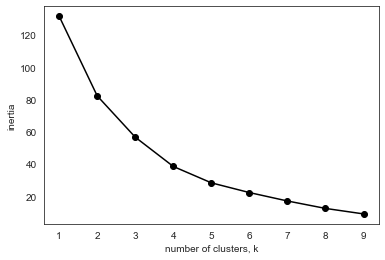

    Team  Cluster Number
0      0               2
1      1               2
2      2               2
3      3               2
4      4               1
5      5               1
6      6               2
7      7               2
8      8               2
9      9               2
10    10               2
11    11               2
12    12               2
13    13               2
14    14               1
15    15               2
16    16               2
17    17               1
18    18               1
19    19               2
20    20               1
21    21               0
22    22               0
23    23               1
24    24               1
25    25               1
26    26               0
27    27               1
28    28               1
29    29               0
30    30               2


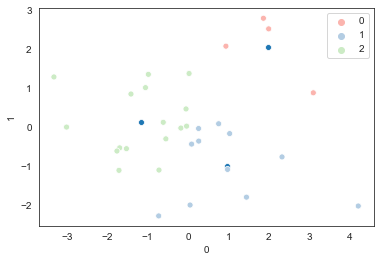

In [199]:
# generate sample Kmeans using 2019 Team Data
complete_k_means(team_2019_features, 3)

### Analysis

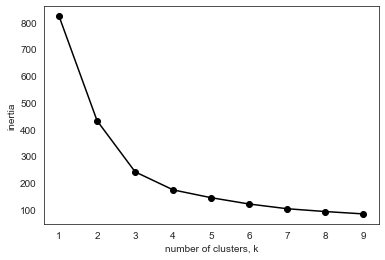

                             Team  Cluster Number
0            Boston Celtics* 1980               0
1        Los Angeles Lakers* 1980               0
2       Seattle SuperSonics* 1980               0
3        Philadelphia 76ers* 1980               0
4           Milwaukee Bucks* 1980               0
5              Phoenix Suns* 1980               0
6             Atlanta Hawks* 1980               0
7         Kansas City Kings* 1980               0
8        Cleveland Cavaliers 1980               0
9           Houston Rockets* 1980               0
10        San Antonio Spurs* 1980               0
11            Indiana Pacers 1980               0
12   Portland Trail Blazers* 1980               0
13           New York Knicks 1980               0
14           New Jersey Nets 1980               0
15       Washington Bullets* 1980               0
16             Chicago Bulls 1980               0
17        San Diego Clippers 1980               0
18     Golden State Warriors 1980               0


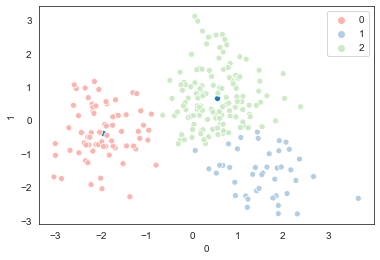

In [201]:
complete_k_means(agg_team_data, 3)

### Scratch Code Work